<h2><i><b>We know that we have different species of Iris flowers (versicolor, virginica, setosa)</b></i></h2>
<i>In our dataset, we have the following features measured for each flower:<br>
<ul>
<li>petal length</li>
<li>petal width</li> 
<li>sepal length</li> 
<li>sepal width</li></ul>
Our objective is to categorize similar flowers in different groups.<br>
with 50 samples for each.


In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

<h2><i><b>Loading Data

In [41]:
df=pd.read_csv("iris_clustering.csv")
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [42]:
df["y_actual"]=df["Species"].replace({'setosa':1,'virginica':0,"versicolor":2})
y_actual=df["y_actual"].values
df1=df.drop(columns="Species")

In [43]:
df1.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,y_actual
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<h2><i><b>Data Preprocessing

In [44]:
x=df1.iloc[:,:].values

<h2><i><b>K Means Clustering

F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


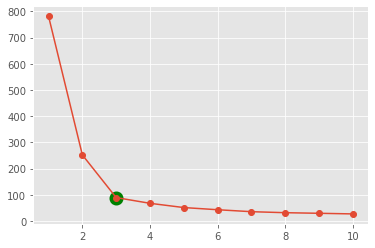

In [45]:
from sklearn.cluster import KMeans
swss=[]
for i in range(1,11):
    clust=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clust.fit(x)
    swss.append(clust.inertia_)
plt.style.use('ggplot')
plt.plot(range(1,11),swss,marker="o")
plt.scatter(3,swss[2],marker='o',s=100,color='green',linewidths=4)
plt.show()


In [46]:
clust=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmean=clust.fit_predict(x)
df["y_kmean"]=y_kmean

<h2><i><b>Agglomerative Clustering

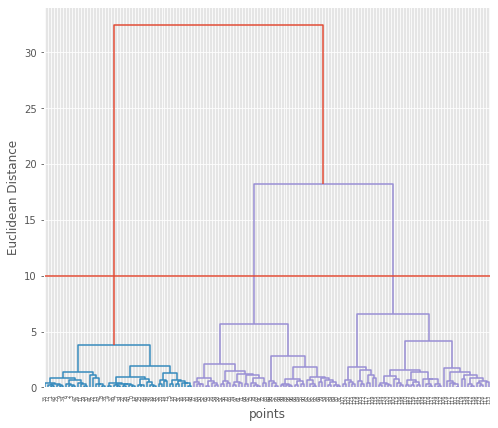

In [47]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(8,7))
dendro=sch.dendrogram(sch.linkage(x,method='ward'))
plt.xlabel("points")
plt.ylabel("Euclidean Distance")
plt.axhline(10)
plt.show()

In [48]:
from sklearn.cluster import AgglomerativeClustering
clust_agglo=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')
y_aglo=clust_agglo.fit_predict(x)
df["y_agglo"]=y_aglo

<h2><i><b>Result Evaluation

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("For K-means : \n",confusion_matrix(y_actual,y_kmean))
print("Accuracy Score : ",accuracy_score(y_actual,y_kmean))
print("\nFor Agglomerative : \n",confusion_matrix(y_actual,y_aglo))
print("Accuracy Score : ",accuracy_score(y_actual,y_aglo))

For K-means : 
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Accuracy Score :  1.0

For Agglomerative : 
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
Accuracy Score :  1.0


<i><b>We got a perfect fit Clustering model.

<h2><b><i>Visualization of different Models w.r.t Actual Values

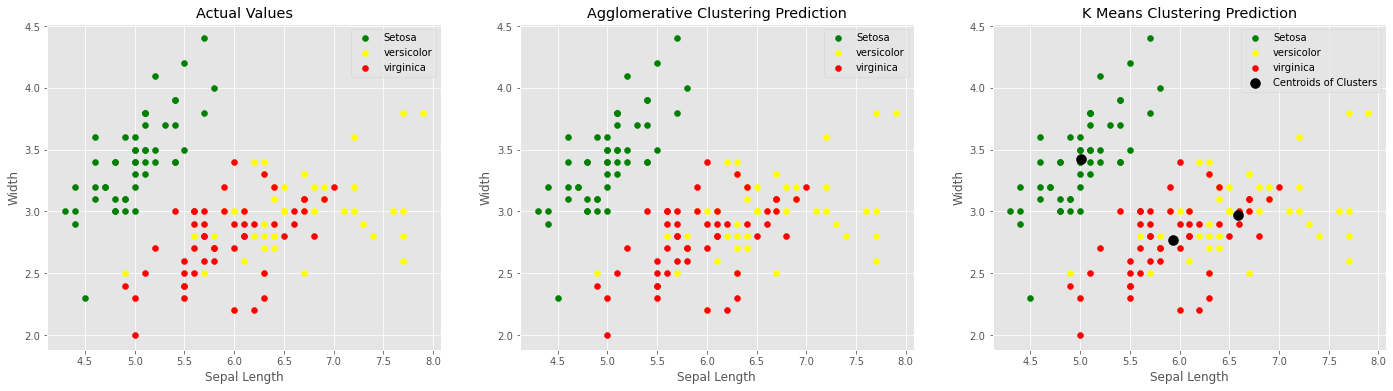

In [61]:
plt.style.use("ggplot")
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(24,6))
filt1=df["y_actual"]==1
filt2=df["y_actual"]==0
filt3=df["y_actual"]==2
ax1.scatter(df[filt1]["Sepal.Length"],df[filt1]["Sepal.Width"],label="Setosa",color='green')
ax1.scatter(df[filt2]["Sepal.Length"],df[filt2]["Sepal.Width"],label="versicolor",color='yellow')
ax1.scatter(df[filt3]["Sepal.Length"],df[filt3]["Sepal.Width"],label="virginica",color='red')
ax1.set_title("Actual Values")
ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Width")
ax1.legend()

filt1=df["y_agglo"]==1
filt2=df["y_agglo"]==0
filt3=df["y_agglo"]==2
ax2.scatter(df[filt1]["Sepal.Length"],df[filt1]["Sepal.Width"],label="Setosa",color='green')
ax2.scatter(df[filt2]["Sepal.Length"],df[filt2]["Sepal.Width"],label="versicolor",color='yellow')
ax2.scatter(df[filt3]["Sepal.Length"],df[filt3]["Sepal.Width"],label="virginica",color='red')
ax2.set_title("Agglomerative Clustering Prediction")
ax2.set_xlabel("Sepal Length")
ax2.set_ylabel("Width")
ax2.legend()

filt1=df["y_kmean"]==1
filt2=df["y_kmean"]==0
filt3=df["y_kmean"]==2
ax3.scatter(df[filt1]["Sepal.Length"],df[filt1]["Sepal.Width"],label="Setosa",color='green')
ax3.scatter(df[filt2]["Sepal.Length"],df[filt2]["Sepal.Width"],label="versicolor",color='yellow')
ax3.scatter(df[filt3]["Sepal.Length"],df[filt3]["Sepal.Width"],label="virginica",color='red')
plt.scatter(clust.cluster_centers_[:,0],clust.cluster_centers_[:,1],color="black",s=100,label="Centroids of Clusters")
ax3.set_title("K Means Clustering Prediction")
ax3.set_xlabel("Sepal Length")
ax3.set_ylabel("Width")
ax3.legend()
plt.show()


<h3><b><i>Comparing graphs of <u>Actual Values</u> vs <u>Agglomerative Clustering</u> vs<u> K Means Clustering</u>.